In [1]:
import numpy as np
np.random.seed(42)
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)

#Pointing custom import path taken from #https://stackoverflow.com/questions/53049195/importing-custom-module-into-jupyter-notebook
import sys
sys.path.append('../modules/')
import os
import model as m

# Getting a baseline score

This gets the average pixel value of a class. The general idea of getting a baseline by comparing its average was developed using ChatGPT with the prompt "How do I dynamically classify images using the folder they are in as a class. Please use the OS module" a more detailed explanation of the code can be found in the [model.py](../modules/model.py) file.

This model simply serves as a baseline for our neural network. At a minimum our model should perform better than 25%, or simply guessing only 1 class. If our baseline model of taking the average pixel value does better than 25% than we will use that score as a baseline instead.

## Assigning paths


In [2]:
# Path to the test image folder
testing_folder_path = '../Images/Testing/'
# Define the paths to the training images for each class
class_names = os.listdir(testing_folder_path)
class_paths = {class_name: os.path.join(testing_folder_path, class_name) for class_name in class_names}

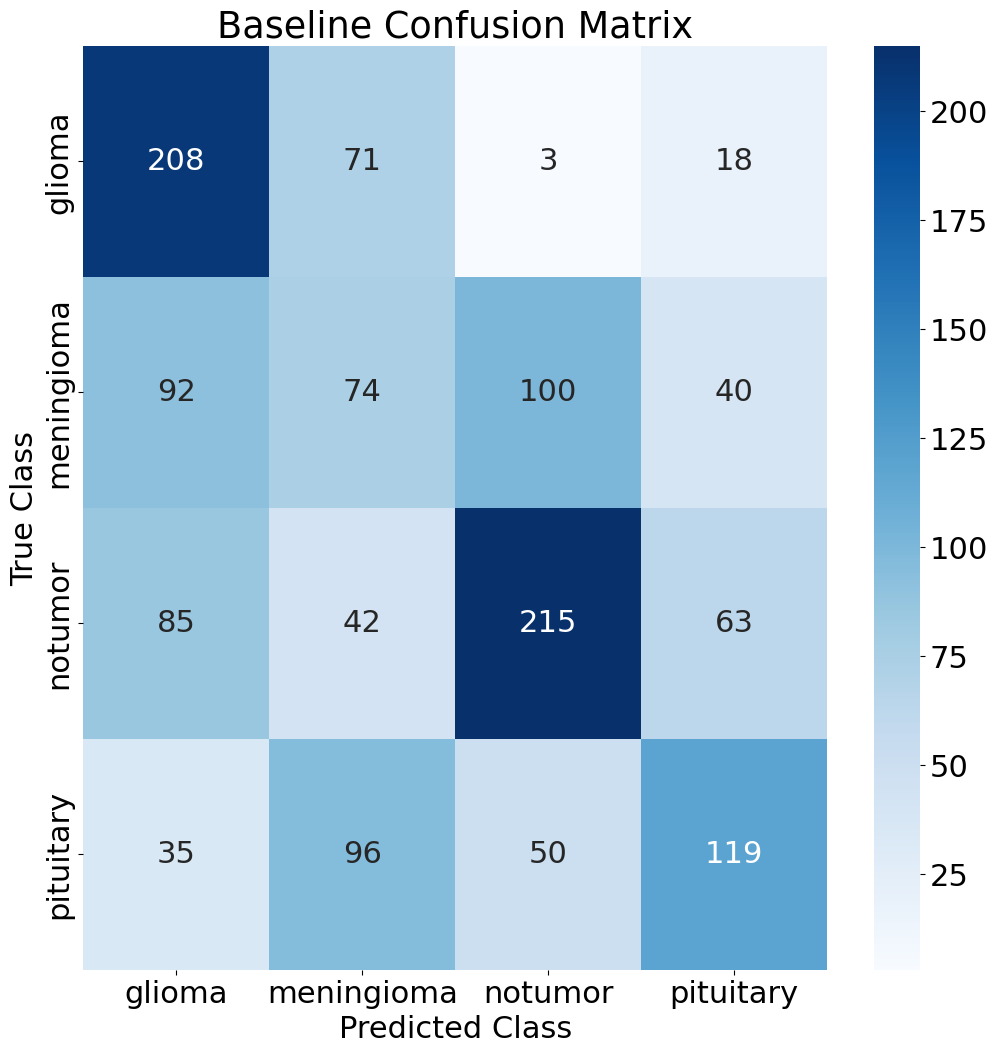

In [3]:
# Classify the test images
actual_classes, predicted_classes = m.classify_images(testing_folder_path, class_paths)

# Calculate metrics
cm, metrics_df = m.calculate_metrics(actual_classes, predicted_classes, class_paths)

# Plot the confusion matrix
m.plot_confusion_matrix(cm, class_paths, 'Baseline')

In [4]:
metrics_df

,Accuracy,Precision,Recall,F1 Score
baseline,0.46987,0.468308,0.46987,0.463567


In [5]:
metrics_df.to_csv('../NoteBooks/scores.csv', index_label='Model')

_______________________________________________________________________________________________________________________-
# Conclusion:


Our baseline model has an accuracy of 46% which is better than simply guessing one class which should theoretically be 25%. This model simply compares which class an image belongs to by seeing the avg pixel value of a class and the image and seeing which class the image is closest to.

With our baseline our most accurate classification, in terms of true positives, is no tumor and glioma. However, we primarily care about the false negatives of our no tumor class. In which case there are 153 mis-classifications compared to 215 correct classification. Because missing a tumor diagnosis can result in the tumor developing further we want to focus on our precision score and reduce the number of false negatives for our no tumor class.

We will now move into a more complex mode, a [neural network](../Notebooks/03_Neural_network.ipynb), to classify our images.